In [540]:
#Importing the needed libraries
import numpy as np
import pandas as pd
import csv

In [541]:
#Importing the raw data 
file = open('hw1_q2_dataset.csv')
csvreader = csv.reader(file, delimiter = ",")
data = []
for row in csvreader:
    data.append(row)

program_data = []
for i in range(0 , len(data)):
    col= []
    for j in range(0,len(data[i])):
        if j==len(data[i])-1:
            col.append(data[i][j])
        else:
            col.append(float(data[i][j]))
    program_data.append(col)
file.close()

In [542]:
#Now we have the program data with us successfully now we will seprate it into training and test data set as per
#Given Conditions
test_data = []
train_data = []
c = 0
p = 0
m = 0
k = 0
for i in range(0,len(program_data)):
    
    if(program_data[i][4]==' Ceramic' and c<6):
        c=c+1
        test_data.append(program_data[i])
    if(program_data[i][4]==' Plastic' and p<6):
        p=p+1
        test_data.append(program_data[i])
    if(program_data[i][4]==' Metal' and m<6):
        m=m+1
        test_data.append(program_data[i])
    if(p>=6 and c>=6 and m>=6):
            train_data.append(program_data[i])
print(len(program_data))
print(len(train_data))
print(test_data)

120
102
[[0.088806749762916, 0.098008394324455, 0.57649058735898, 3.239527050286, ' Ceramic'], [0.078963683508211, 0.085300149997219, 0.27162441732486, 3.4442845617291, ' Metal'], [0.1317769211421, 0.070414892852672, 0.50961174676178, 3.984839303975, ' Ceramic'], [0.12238449845956, 0.081946645569603, 0.64441296678112, 3.4343857831642, ' Ceramic'], [0.11207208488382, 0.15, 0.3736066136156, 2.4684426455694, ' Plastic'], [0.11696836534332, 0.1192966406841, 0.3315496717105, 1.8135585032895, ' Plastic'], [0.12666802764538, 0.15, 0.41499442802485, 2.9562056990404, ' Plastic'], [0.10444296796273, 0.10662125348196, 0.29055615215118, 3.4594532366829, ' Plastic'], [0.13065405525064, 0.14162609670298, 0.33516279766318, 2.759442528738, ' Plastic'], [0.11931866537973, 0.10053257281629, 0.29777585695821, 4.0332186383189, ' Plastic'], [0.082429457069664, 0.03, 0.13468307216616, 1.6519180922721, ' Ceramic'], [0.091479158720172, 0.060070441860045, 0.19527332743138, 3.6252435307061, ' Metal'], [0.071660

In [543]:
#Now we have successfully done with our training and test data now we will replace the classes of plastic with 
# 1 and all the other classes with -1 in order to perform svm

for i in range (0, len(train_data)):
    if(train_data[i][4]==' Plastic'):
        train_data[i][4]=1
    else:
        train_data[i][4]=-1
for i in range (0, len(test_data)):
    if(test_data[i][4]==' Plastic'):
        test_data[i][4]=1
    else:
        test_data[i][4]=-1

In [544]:
#We have converted the given raw datasets into dataframes uisng pandas 
column_names = ["Height","Diameter","Weight","Hue","Target"]
train_df = pd.DataFrame(data=train_data , columns =column_names)
print(train_df)
test_df = pd.DataFrame(data = test_data, columns = column_names)
print(test_df)

       Height  Diameter    Weight       Hue  Target
0    0.067031  0.034838  0.179819  3.636175      -1
1    0.108458  0.150000  0.306318  2.722515       1
2    0.103512  0.090147  0.377976  2.223620      -1
3    0.057934  0.093972  0.262637  3.075580      -1
4    0.082217  0.030000  0.189613  3.678381      -1
..        ...       ...       ...       ...     ...
97   0.098756  0.054586  0.148043  4.534858       1
98   0.126426  0.150000  0.426797  1.917094       1
99   0.113290  0.088749  0.215229  3.594055       1
100  0.089571  0.111778  0.238260  2.306854       1
101  0.135284  0.118502  0.375304  1.713649       1

[102 rows x 5 columns]
      Height  Diameter    Weight       Hue  Target
0   0.088807  0.098008  0.576491  3.239527      -1
1   0.078964  0.085300  0.271624  3.444285      -1
2   0.131777  0.070415  0.509612  3.984839      -1
3   0.122384  0.081947  0.644413  3.434386      -1
4   0.112072  0.150000  0.373607  2.468443       1
5   0.116968  0.119297  0.331550  1.813559    

In [545]:
#Now we are seprating the traget value
X_train = train_df.drop(['Hue','Target'],axis = 'columns')
Y_train = train_df.Target
X_test = test_df.drop(['Hue','Target'],axis = 'columns')
Y_test = test_df.Target
print(X_train)

       Height  Diameter    Weight
0    0.067031  0.034838  0.179819
1    0.108458  0.150000  0.306318
2    0.103512  0.090147  0.377976
3    0.057934  0.093972  0.262637
4    0.082217  0.030000  0.189613
..        ...       ...       ...
97   0.098756  0.054586  0.148043
98   0.126426  0.150000  0.426797
99   0.113290  0.088749  0.215229
100  0.089571  0.111778  0.238260
101  0.135284  0.118502  0.375304

[102 rows x 3 columns]


In [546]:
import sklearn
from sklearn.svm import SVC

In [547]:
model = SVC(kernel='linear',C =20, gamma = "auto")

In [548]:
model.fit(X_train,Y_train)

SVC(C=20, gamma='auto', kernel='linear')

In [549]:
y_pred = model.predict(X_test)
y_train_predict = model.predict(X_train)

In [550]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix on Test Data \n")
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print("Confusion Matrix on Train Data \n")
print(confusion_matrix(Y_train,y_train_predict))
print(classification_report(Y_train,y_train_predict))

Confusion Matrix on Test Data 

[[11  1]
 [ 0  6]]
              precision    recall  f1-score   support

          -1       1.00      0.92      0.96        12
           1       0.86      1.00      0.92         6

    accuracy                           0.94        18
   macro avg       0.93      0.96      0.94        18
weighted avg       0.95      0.94      0.95        18

Confusion Matrix on Train Data 

[[47  2]
 [ 3 50]]
              precision    recall  f1-score   support

          -1       0.94      0.96      0.95        49
           1       0.96      0.94      0.95        53

    accuracy                           0.95       102
   macro avg       0.95      0.95      0.95       102
weighted avg       0.95      0.95      0.95       102



# Observations

As we can see that both the accurcay score for training and testing is 95% and 94% thus we can say that there is no overfitting as the function has performed well in both training set as well as test set

# Weights And Bias For Linear SVM

In [551]:
w = model.coef_[0]
b = model.intercept_[0]
print(w)
print(b)

[19.91669287 19.60488255 -7.26021861]
-1.3602133261274485


# List of all Support Vectors 

In [552]:
print(model.support_vectors_)
print(len(model.support_vectors_))

[[0.06703118 0.03483752 0.1798193 ]
 [0.10351159 0.09014725 0.37797606]
 [0.05793416 0.09397155 0.26263699]
 [0.08221662 0.03       0.18961277]
 [0.08462625 0.08827631 0.34135824]
 [0.08074723 0.03958283 0.15597198]
 [0.08171452 0.07817347 0.37083915]
 [0.07319519 0.06965337 0.26294981]
 [0.09682131 0.11009941 0.43350062]
 [0.09300297 0.10464387 0.43050163]
 [0.08766258 0.09888996 0.35883374]
 [0.06274602 0.04541354 0.15581607]
 [0.10956946 0.07421247 0.36381958]
 [0.0786015  0.09549515 0.28026109]
 [0.07757021 0.07121045 0.28627049]
 [0.08675475 0.09961684 0.37192596]
 [0.0804317  0.07969325 0.32328035]
 [0.0833366  0.07023926 0.22927271]
 [0.07720291 0.0422354  0.14109242]
 [0.07294965 0.08791001 0.2710513 ]
 [0.080822   0.04252602 0.2757571 ]
 [0.06666305 0.06547362 0.23559443]
 [0.06541811 0.03898384 0.19226271]
 [0.05475818 0.03779394 0.13647211]
 [0.06474902 0.05959451 0.22001702]
 [0.10544878 0.08767078 0.41452189]
 [0.10559643 0.12468653 0.55019728]
 [0.08226648 0.10348754 0.36

# Visualizations


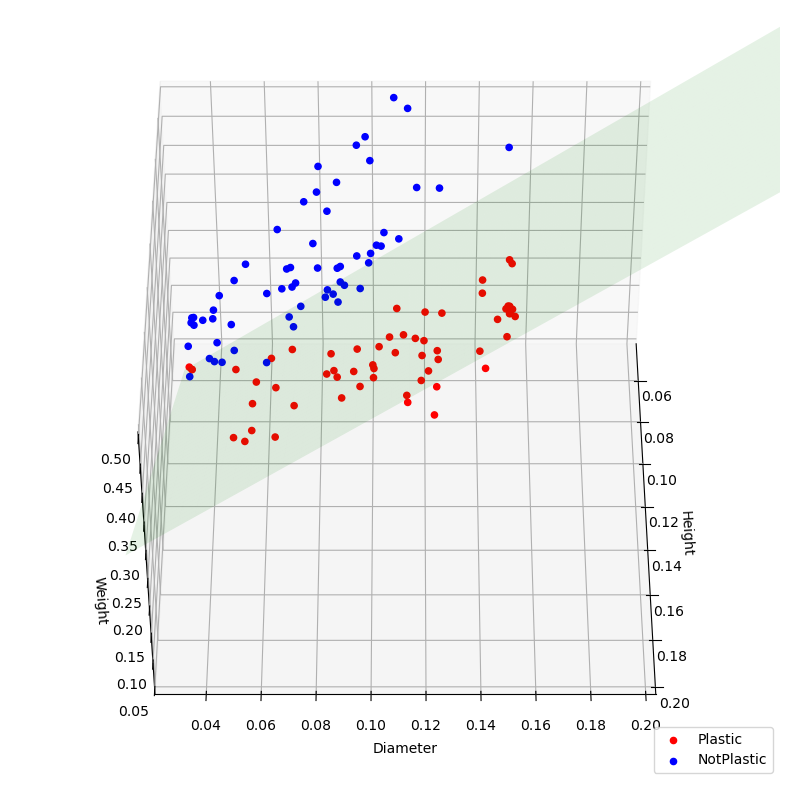

In [553]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
a_data = pd.DataFrame(data=program_data , columns =column_names)
plastic = a_data[a_data['Target']==1]
not_plastic = a_data[a_data['Target']==-1]
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter(plastic['Height'], plastic['Diameter'], plastic['Weight'], color = "red",alpha=1)
ax.scatter(not_plastic['Height'],not_plastic['Diameter'],not_plastic['Weight'], color = "blue",alpha=1)
ax.set_xlim(0.045,0.2)
ax.set_ylim(0.025,0.2) 
ax.set_zlim(0.05,0.5)
x = np.linspace(0.045,0.3,100)
y = np.linspace(0.025,0.3,100)
x, y = np.meshgrid(x, y)
z = -(w[0]/w[2])*x -(w[1]/w[2])*y-(b/w[2])
ax.plot_surface(x,y,z,alpha=0.1,color = "green")
ax.view_init(45,0)
plt.legend(["Plastic", "NotPlastic"], loc ="lower right")
ax.set_xlabel('Height')
ax.set_ylabel('Diameter')
ax.set_zlabel('Weight')
plt.show()

# Gaussian Kernel

In [554]:
model_g = SVC(kernel='rbf',C=13,gamma=2)

In [555]:
model_g.fit(X_train,Y_train)

SVC(C=13, gamma=2)

In [556]:
y_g_pred = model_g.predict(X_test)
y_g_train_predict = model_g.predict(X_train)

In [557]:
print("Confusion Matrix on Test Data \n")
print(confusion_matrix(Y_test,y_g_pred))
print(classification_report(Y_test,y_g_pred))
print("Confusion Matrix on Train Data \n")
print(confusion_matrix(Y_train,y_g_train_predict))
print(classification_report(Y_train,y_g_train_predict))

Confusion Matrix on Test Data 

[[11  1]
 [ 0  6]]
              precision    recall  f1-score   support

          -1       1.00      0.92      0.96        12
           1       0.86      1.00      0.92         6

    accuracy                           0.94        18
   macro avg       0.93      0.96      0.94        18
weighted avg       0.95      0.94      0.95        18

Confusion Matrix on Train Data 

[[49  0]
 [ 1 52]]
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99        49
           1       1.00      0.98      0.99        53

    accuracy                           0.99       102
   macro avg       0.99      0.99      0.99       102
weighted avg       0.99      0.99      0.99       102



# Visualization

In [558]:
print(np.amax(a_data,axis=0))
print(np.amin(a_data,axis=0))


Height      0.176296
Diameter    0.150000
Weight      0.750000
Hue         5.408671
dtype: float64
Height      0.050000
Diameter    0.030000
Weight      0.100000
Hue         0.922024
dtype: float64


/Users/shyampatel/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return reduction(axis=axis, out=out, **passkwargs)
/Users/shyampatel/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return reduction(axis=axis, out=out, **passkwargs)


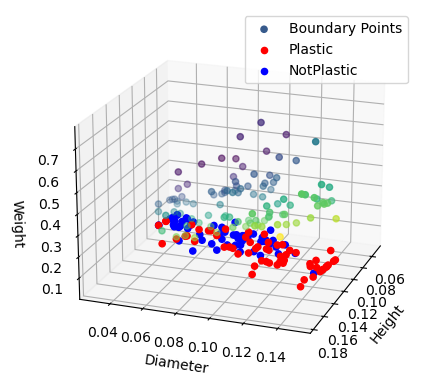

In [564]:
plastic = a_data[a_data['Target']==1]
not_plastic = a_data[a_data['Target']==-1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
rdf = model_g.decision_function(X_train)
ax.scatter(X_train['Height'], X_train['Diameter'], X_train['Weight'],c=rdf)
ax.set_xlabel('Height')
ax.set_ylabel('Diameter')
ax.set_zlabel('Weight')
ax.scatter(plastic['Height'], plastic['Diameter'],plastic['Height'] ,color = "red",alpha=1)
ax.scatter(not_plastic['Height'],not_plastic['Diameter'],not_plastic['Height'],color = "blue",alpha=1)
ax.view_init(20,20)
plt.legend(["Boundary Points","Plastic", "NotPlastic",], loc ="upper right")
plt.show()




# List of Support Vectors

In [487]:
print(model.support_vectors_)
print(len(model.support_vectors_))

[[0.06703118 0.03483752 0.1798193 ]
 [0.10351159 0.09014725 0.37797606]
 [0.05793416 0.09397155 0.26263699]
 [0.08221662 0.03       0.18961277]
 [0.08462625 0.08827631 0.34135824]
 [0.08074723 0.03958283 0.15597198]
 [0.08171452 0.07817347 0.37083915]
 [0.07319519 0.06965337 0.26294981]
 [0.09682131 0.11009941 0.43350062]
 [0.09300297 0.10464387 0.43050163]
 [0.08766258 0.09888996 0.35883374]
 [0.06274602 0.04541354 0.15581607]
 [0.10956946 0.07421247 0.36381958]
 [0.0786015  0.09549515 0.28026109]
 [0.07757021 0.07121045 0.28627049]
 [0.08675475 0.09961684 0.37192596]
 [0.0804317  0.07969325 0.32328035]
 [0.0833366  0.07023926 0.22927271]
 [0.07720291 0.0422354  0.14109242]
 [0.07294965 0.08791001 0.2710513 ]
 [0.080822   0.04252602 0.2757571 ]
 [0.06666305 0.06547362 0.23559443]
 [0.06541811 0.03898384 0.19226271]
 [0.05475818 0.03779394 0.13647211]
 [0.06474902 0.05959451 0.22001702]
 [0.10544878 0.08767078 0.41452189]
 [0.10559643 0.12468653 0.55019728]
 [0.08226648 0.10348754 0.36